# Many Assets

<a href="#Read-CSV-File">Read CSV File</a>

<a href="#Plot-Adj-Close">Plot Adj Close</a>

<a href="#Plot-Normalized-Adj-Close">Plot Normalized Adj Close</a>

<a href="#Compute-Daily-Return">Compute Daily Return</a>

<a href="#Compute-Annualized-Expected-Return,-Volatility,-and-Covariance-Matrix">Compute Annualized Expected Return, Volatility, and Covariance Matrix</a>

<a href="#Risk-Return-Plot">Risk Return Plot</a>

# Basic Statistics of $n$ Assets

$$\begin{array}{lllll}
\mbox{Return}&&\displaystyle
{\bf r}
=
\left[\begin{array}{c}
r^{(1)}_t\\\vdots\\r^{(n)}_t
\end{array}\right]
=
\left[\begin{array}{c}
\frac{S^{(1)}_t-S^{(1)}_{t-1}}{S^{(1)}_{t-1}}\\\vdots\\\frac{S^{(n)}_t-S^{(n)}_{t-1}}{S^{(n)}_{t-1}}
\end{array}\right]
\nonumber\\
\\
\mbox{Expected return}&&\displaystyle
\mu
=
252*E{\bf r}_t
=
\left[\begin{array}{c}
\mu_1\\\vdots\\\mu_n
\end{array}\right]\nonumber\\
\\
\mbox{Covariance}&&\displaystyle
\Sigma
=
252*E({\bf r}_t-E{\bf r}_t)({\bf r}_t-E{\bf r}_t)^T
=
\left[\begin{array}{cccc}
\sigma_1^2&\sigma_{12}&\cdots&\sigma_{1n}\\
\sigma_{21}&\sigma_{2}^2&\cdots&\sigma_{2n}\\
\vdots&\vdots&\ddots&\vdots\\
\sigma_{n1}&\sigma_{n2}&\cdots&\sigma_{n}^2
\end{array}\right]\nonumber
\end{array}$$

# Basic Statistics of Portfolio

$$\begin{array}{llll}
\mbox{Portfolio}&&\displaystyle
{\bf x}
=
\left[\begin{array}{c}
x_1\\\vdots\\x_n
\end{array}\right]
\quad\mbox{with}\quad
{\bf 1}^T{\bf x}=1\nonumber\\
\\
\mbox{Return}&&\displaystyle
r_{\bf x}
=
{\bf r}^T{\bf x}\nonumber\\
\\
\mbox{Expected return}&&\displaystyle
\mu_{\bf x}
=
\mu^T{\bf x}\nonumber\\
\\
\mbox{Variance}&&\displaystyle
\sigma_{\bf x}^2
=
{\bf x}^T\Sigma{\bf x}\nonumber
\end{array}$$

# Read CSV Fle

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
start = "2017-01-01"
end   = "2017-12-31"
dates = pd.date_range(start, end)

In [11]:
def toss(dates):
    n = 0
    try:
        yield dates[n], dates[n+21]
        n += 1
    except:
        pass
    
x = toss(dates)
next(x)

(Timestamp('2017-01-01 00:00:00', freq='D'),
 Timestamp('2017-01-22 00:00:00', freq='D'))

In [3]:
data_dir = "./data/dow30"

In [4]:
csv_file_list = os.listdir(data_dir)
if csv_file_list[0] == '.DS_Store': 
    csv_file_list = os.listdir(data_dir)[1:]
csv_file_list

['CSCO.csv',
 'BA.csv',
 'V.csv',
 'UTX.csv',
 'MRK.csv',
 'PG.csv',
 'CAT.csv',
 'MCD.csv',
 'INTC.csv',
 'MMM.csv',
 'DWDP.csv',
 'KO.csv',
 'MSFT.csv',
 'HD.csv',
 'AXP.csv',
 'XOM.csv',
 'CVX.csv',
 'NKE.csv',
 'IBM.csv',
 'GS.csv',
 'DIS.csv',
 'GE.csv',
 'JPM.csv',
 'SPY.csv',
 'PFE.csv',
 'VZ.csv',
 'UNH.csv',
 'AAPL.csv',
 'WMT.csv',
 'TRV.csv',
 'JNJ.csv']

In [5]:
ticker_list = [] 
for csv_file in csv_file_list:
    ticker_list.append(csv_file.replace(".csv", ""))
ticker_list

['CSCO',
 'BA',
 'V',
 'UTX',
 'MRK',
 'PG',
 'CAT',
 'MCD',
 'INTC',
 'MMM',
 'DWDP',
 'KO',
 'MSFT',
 'HD',
 'AXP',
 'XOM',
 'CVX',
 'NKE',
 'IBM',
 'GS',
 'DIS',
 'GE',
 'JPM',
 'SPY',
 'PFE',
 'VZ',
 'UNH',
 'AAPL',
 'WMT',
 'TRV',
 'JNJ']

In [6]:
benchmark = 'SPY'
if benchmark not in ticker_list:
    ticker_list.append(benchmark)  
ticker_list

['CSCO',
 'BA',
 'V',
 'UTX',
 'MRK',
 'PG',
 'CAT',
 'MCD',
 'INTC',
 'MMM',
 'DWDP',
 'KO',
 'MSFT',
 'HD',
 'AXP',
 'XOM',
 'CVX',
 'NKE',
 'IBM',
 'GS',
 'DIS',
 'GE',
 'JPM',
 'SPY',
 'PFE',
 'VZ',
 'UNH',
 'AAPL',
 'WMT',
 'TRV',
 'JNJ']

In [7]:
for data_type in ["Open", "High", "Low", "Close", "Adj Close", "Volume"]:
        
    df = pd.DataFrame(index=dates) 
    for ticker in ticker_list: 
        csv_file_path = os.path.join(data_dir, ticker + ".csv") 
            
        df_temp = pd.read_csv(csv_file_path,
                              index_col="Date",
                              parse_dates=True,
                              usecols=["Date", data_type],
                              na_values=["null"]) 
            
        df_temp = df_temp.rename(columns={data_type: ticker})
        df = df.join(df_temp)

        if ticker == benchmark:
            df = df.dropna(subset=[benchmark])

    if data_type == "Open":
        df_open = df
    if data_type == "High":
        df_high = df   
    if data_type == "Low":
        df_low = df    
    if data_type == "Close":
        df_close = df
    if data_type == "Adj Close":
        df_adj_close = df
    if data_type == "Volume":
        df_volume = df   

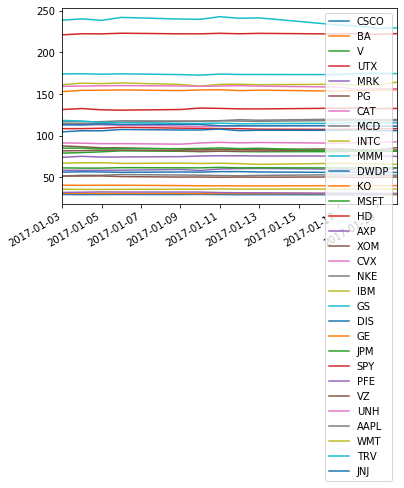

In [8]:
def toss(dates):
    n = 0
    try:
        yield dates[n], dates[n+21]
        n += 1
    except:
        pass
    
x = toss(dates)
start, end = next(x)
df_adj_close.loc[start:end].plot()

In [8]:
df_adj_close.head()

,CSCO,BA,V,UTX,MRK,PG,CAT,MCD,INTC,MMM,...,GE,JPM,SPY,PFE,VZ,UNH,AAPL,WMT,TRV,JNJ
2017-01-03,29.267542,152.712234,78.941193,108.265480,58.361000,81.645973,91.241867,116.615036,35.592518,173.964478,...,30.656155,84.842056,220.944565,31.750917,51.464443,159.046295,114.311760,66.929802,118.170387,112.906372
2017-01-04,29.093559,154.317474,79.586624,108.333862,58.341599,81.936874,90.834152,116.478561,35.407749,174.228271,...,30.665831,84.998543,222.259018,32.029945,51.407864,159.499451,114.183815,67.319717,117.535065,112.721184
2017-01-05,29.161221,154.405045,80.520012,108.773445,58.322193,82.479881,90.280807,116.693024,35.349400,173.632263,...,30.491701,84.216133,222.082443,32.337833,51.521015,159.765411,114.764473,67.465942,115.658417,113.900543
2017-01-06,29.219213,154.784485,81.632141,109.945686,58.477436,82.450790,90.319641,117.726402,35.475822,174.140320,...,30.578764,84.225914,222.876999,32.212746,50.756706,159.992004,116.043915,66.539886,115.599762,113.354736
2017-01-09,29.170887,154.025635,81.175377,108.919983,59.282749,81.839912,89.669243,117.404694,35.602245,173.202347,...,30.433657,84.284584,222.141312,32.203129,50.203968,159.538849,117.106812,66.978539,114.671211,113.335228


In [9]:
df_adj_close.tail()

,CSCO,BA,V,UTX,MRK,PG,CAT,MCD,INTC,MMM,...,GE,JPM,SPY,PFE,VZ,UNH,AAPL,WMT,TRV,JNJ
2017-12-22,38.264591,295.100006,112.690002,127.230003,56.360001,92.129997,155.750000,171.419998,46.700001,234.729996,...,17.379999,106.893158,267.510010,36.139999,52.590988,220.000000,175.009995,98.209999,134.389999,140.119995
2017-12-26,38.195110,295.359985,112.989998,127.139999,56.340000,92.480003,156.440002,171.289993,46.080002,235.449997,...,17.430000,106.465385,267.190002,36.209999,52.620655,219.600006,170.570007,99.160004,134.779999,140.089996
2017-12-27,38.274517,295.619995,114.019997,127.580002,56.340000,92.099998,157.520004,172.669998,46.110001,236.199997,...,17.379999,106.664352,267.320007,36.330002,52.679974,220.419998,170.600006,99.260002,134.770004,140.570007
2017-12-28,38.304295,296.350006,114.349998,128.119995,56.599998,92.070000,158.419998,173.100006,46.220001,235.720001,...,17.360001,107.231400,267.869995,36.369999,52.828289,222.770004,171.080002,99.400002,135.660004,140.559998
2017-12-29,38.016441,294.910004,114.019997,127.570000,56.270000,91.879997,157.580002,172.119995,46.160000,235.369995,...,17.450001,106.385803,266.859985,36.220001,52.333920,220.460007,169.229996,98.750000,135.639999,139.720001


[<a href="#Many-Assets">Back to top</a>]

# Plot Adj Close

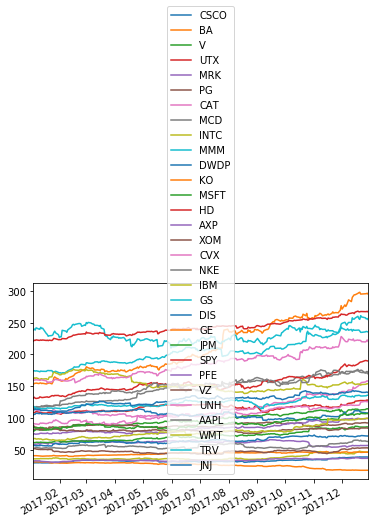

In [10]:
df_adj_close.plot()

[<a href="#Many-Assets">Back to top</a>]

# Plot Normalized Adj Close

In [11]:
df_normalized_adj_close = df_adj_close / df_adj_close.iloc[0,:]  

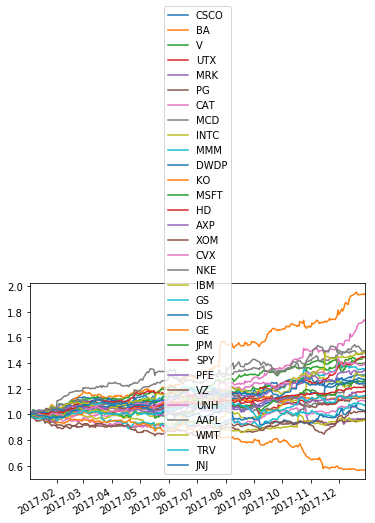

In [12]:
df_normalized_adj_close.plot()

[<a href="#Many-Assets">Back to top</a>]

# Compute Daily Return

In [13]:
df_daily_return = df_adj_close.pct_change()
df_daily_return.head()

,CSCO,BA,V,UTX,MRK,PG,CAT,MCD,INTC,MMM,...,GE,JPM,SPY,PFE,VZ,UNH,AAPL,WMT,TRV,JNJ
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.005945,0.010512,0.008176,0.000632,-0.000332,0.003563,-0.004469,-0.001170,-0.005191,0.001516,...,0.000316,0.001844,0.005949,0.008788,-0.001099,0.002849,-0.001119,0.005826,-0.005376,-0.001640
2017-01-05,0.002326,0.000567,0.011728,0.004058,-0.000333,0.006627,-0.006092,0.001841,-0.001648,-0.003421,...,-0.005678,-0.009205,-0.000794,0.009613,0.002201,0.001667,0.005085,0.002172,-0.015967,0.010463
2017-01-06,0.001989,0.002457,0.013812,0.010777,0.002662,-0.000353,0.000430,0.008856,0.003576,0.002926,...,0.002855,0.000116,0.003578,-0.003868,-0.014835,0.001418,0.011148,-0.013726,-0.000507,-0.004792
2017-01-09,-0.001654,-0.004903,-0.005595,-0.009329,0.013771,-0.007409,-0.007201,-0.002733,0.003564,-0.005386,...,-0.004745,0.000697,-0.003301,-0.000299,-0.010890,-0.002832,0.009159,0.006592,-0.008032,-0.000172


In [14]:
df_daily_return.describe()

,CSCO,BA,V,UTX,MRK,PG,CAT,MCD,INTC,MMM,...,GE,JPM,SPY,PFE,VZ,UNH,AAPL,WMT,TRV,JNJ
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.001096,0.002696,0.001505,0.000690,-0.000097,0.000496,0.002269,0.001592,0.001098,0.001242,...,-0.002172,0.000958,0.000764,0.000551,0.000124,0.001347,0.001632,0.001621,0.000584,0.000879
std,0.009889,0.011076,0.008131,0.008233,0.009827,0.006803,0.012840,0.008183,0.010816,0.007984,...,0.012504,0.010231,0.004234,0.007018,0.010694,0.008999,0.011113,0.011484,0.008120,0.007217
min,-0.072147,-0.028496,-0.030875,-0.056903,-0.060611,-0.036467,-0.042808,-0.032192,-0.034197,-0.050524,...,-0.071742,-0.038124,-0.017744,-0.018241,-0.043694,-0.036847,-0.038777,-0.046509,-0.037281,-0.031021
25%,-0.003234,-0.003763,-0.002613,-0.003257,-0.004356,-0.002929,-0.004368,-0.002199,-0.004874,-0.002283,...,-0.006727,-0.004184,-0.001206,-0.003645,-0.005881,-0.003407,-0.003724,-0.003651,-0.003670,-0.002780
50%,0.001225,0.002045,0.001706,0.001356,-0.000076,0.000232,0.001247,0.001098,0.000983,0.000561,...,-0.001619,0.000117,0.000517,0.000000,-0.000543,0.001384,0.000580,0.001470,0.000952,0.000073
75%,0.005860,0.008474,0.006030,0.004118,0.004575,0.003861,0.007395,0.005224,0.005956,0.004976,...,0.004387,0.006687,0.002498,0.004075,0.005212,0.006514,0.006940,0.006166,0.004749,0.004957
max,0.051891,0.098795,0.045929,0.029220,0.036466,0.037105,0.078608,0.055651,0.073761,0.059129,...,0.035791,0.035258,0.013997,0.032126,0.076802,0.055331,0.060981,0.108984,0.039764,0.034308


[<a href="#Many-Assets">Back to top</a>]

# Compute Annualized Expected Return, Volatility, and Covariance Matrix 

In [15]:
def compute_expected_return(df_daily_return):
    return 252 * df_daily_return.mean() 

In [16]:
df_mu = compute_expected_return(df_daily_return)
df_mu

CSCO    0.276143
BA      0.679319
V       0.379170
UTX     0.174000
MRK    -0.024541
PG      0.124868
CAT     0.571867
MCD     0.401063
INTC    0.276742
MMM     0.312888
DWDP    0.255614
KO      0.131320
MSFT    0.348395
HD      0.378995
AXP     0.303066
XOM    -0.039904
CVX     0.110124
NKE     0.223443
IBM    -0.036145
GS      0.085639
DIS     0.040388
GE     -0.547421
JPM     0.241311
SPY     0.192646
PFE     0.138935
VZ      0.031130
UNH     0.339457
AAPL    0.411191
WMT     0.408517
TRV     0.147287
JNJ     0.221399
dtype: float64

In [17]:
def compute_volatility(df_daily_return):
    return np.sqrt(252) * df_daily_return.std()

In [18]:
df_vol = compute_volatility(df_daily_return)
df_vol

CSCO    0.156982
BA      0.175823
V       0.129083
UTX     0.130701
MRK     0.156003
PG      0.107991
CAT     0.203835
MCD     0.129905
INTC    0.171706
MMM     0.126750
DWDP    0.171347
KO      0.090358
MSFT    0.148214
HD      0.131320
AXP     0.131050
XOM     0.111800
CVX     0.141045
NKE     0.218068
IBM     0.157063
GS      0.197145
DIS     0.150830
GE      0.198499
JPM     0.162411
SPY     0.067219
PFE     0.111414
VZ      0.169759
UNH     0.142857
AAPL    0.176406
WMT     0.182298
TRV     0.128896
JNJ     0.114559
dtype: float64

In [ ]:
df_sharpe = df_mu / df_vol
df_sharpe

In [19]:
def compute_covariance_matrix(df_daily_return):
    return 252 * df_daily_return.cov()

In [20]:
df_cov = compute_covariance_matrix(df_daily_return)
df_cov

,CSCO,BA,V,UTX,MRK,PG,CAT,MCD,INTC,MMM,...,GE,JPM,SPY,PFE,VZ,UNH,AAPL,WMT,TRV,JNJ
CSCO,0.024643,0.003966,0.005588,0.005082,0.003545,0.002690,0.008098,0.002292,0.007637,0.005074,...,0.004545,0.007516,0.005394,0.003826,0.003564,0.002391,0.005601,0.004660,0.002233,0.004195
BA,0.003966,0.030914,0.005426,0.006046,0.001077,0.000681,0.008629,0.001231,0.004181,0.004305,...,0.006604,0.006934,0.004396,0.001707,0.004391,0.003268,0.004457,-0.000406,0.001519,0.000395
V,0.005588,0.005426,0.016662,0.005502,-0.000359,0.000905,0.004905,0.004484,0.006007,0.004411,...,-0.000582,0.004382,0.004699,0.001437,-0.001730,0.003817,0.008412,0.001402,0.000266,0.002428
UTX,0.005082,0.006046,0.005502,0.017083,0.001709,-0.000175,0.005567,0.002331,0.004563,0.004884,...,0.002465,0.005127,0.003579,0.003754,0.001230,0.003496,0.003469,0.000732,0.003913,0.002205
MRK,0.003545,0.001077,-0.000359,0.001709,0.024337,0.003444,0.001256,0.000815,-0.001328,0.002582,...,0.006825,0.004077,0.002312,0.006066,0.008394,0.001463,-0.001919,0.003654,0.001900,0.004480
PG,0.002690,0.000681,0.000905,-0.000175,0.003444,0.011662,0.003542,0.002782,0.001684,0.000935,...,0.001240,-0.000112,0.001522,0.001606,0.003036,-0.000014,0.000764,0.002484,0.001555,0.001961
CAT,0.008098,0.008629,0.004905,0.005567,0.001256,0.003542,0.041549,0.009591,0.007082,0.005066,...,0.004167,0.012166,0.006650,0.001678,0.002789,0.003368,0.006184,0.001600,0.002869,-0.000169
MCD,0.002292,0.001231,0.004484,0.002331,0.000815,0.002782,0.009591,0.016875,0.003047,0.000378,...,-0.001771,0.002020,0.002498,0.000156,-0.000219,0.003149,0.004382,0.001782,0.001678,0.002133
INTC,0.007637,0.004181,0.006007,0.004563,-0.001328,0.001684,0.007082,0.003047,0.029483,0.004264,...,0.000144,0.005405,0.005221,-0.000031,0.001838,0.004242,0.010042,0.003041,0.002179,0.001416
MMM,0.005074,0.004305,0.004411,0.004884,0.002582,0.000935,0.005066,0.000378,0.004264,0.016066,...,0.001369,0.002945,0.003114,0.003277,0.003802,0.004112,0.003032,-0.000454,0.002550,0.004063


[<a href="#Many-Assets">Back to top</a>]

# Risk Return Plot

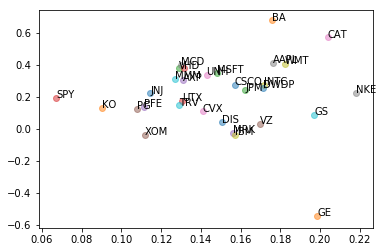

In [21]:
fig, ax = plt.subplots()
     
for i, ticker in enumerate(ticker_list):
    ax.scatter(df_vol[i], df_mu[i], alpha=0.5)
    ax.annotate(ticker, (df_vol[i],df_mu[i]))
    
plt.show()

[<a href="#Many-Assets">Back to top</a>]